In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
vaccine_mandate=pd.read_csv('all_covid_demographics.csv',parse_dates=['Week Ending'])

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,85,86,239,247,249,251,252,253,255,258,260,261,262,264,267,269,270,274,275,278,280,283,284,285) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
vaccine_mandate.shape

(118554, 287)

In [13]:
pd.set_option('display.max_columns', 300)

In [14]:
vaccine_mandate.head()

,Unnamed: 0,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,State,Provider Zip Code,Provider Phone Number,County,Submitted Data,Passed Quality Assurance Check,Residents Weekly Admissions COVID-19,Residents Total Admissions COVID-19,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly Suspected COVID-19,Residents Total Suspected COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Resident Access to Testing in Facility,Laboratory Type Is State Health Dept,Laboratory Type Is Private Lab,Laboratory Type Is Other,Able to Test or Obtain Resources to Test All Current Residents Within Next 7 Days,Reason for Not Testing Residents - Lack of PPE for Personnel,Reason for Not Testing Residents - Lack of Supplies,Reason for Not Testing Residents - Lack of Access to Laboratory,Reason for Not Testing Residents - Lack of Access to Trained Personnel,Reason for Not Testing Residents - Uncertainty About Reimbursement,Reason for Not Testing Residents - Other,During Past Two Weeks Average Time to Receive Resident Test Results,Has Facility Performed Resident Tests Since Last Report,Tested Residents with New Signs or Symptoms,Tested Asymptomatic Residents in a Unit or Section After a New Case,Tested Asymptomatic Residents Facility-Wide After a New Case,Tested Asymptomatic Residents Without Known Exposure as Surveillance,Tested Another Subgroup of Residents,Able to Test or Obtain Resources to Test All Staff and/or Personnel Within Next 7 Days,Reason for Not Testing Staff and/or Personnel - Lack of PPE for Personnel,Reason for Not Testing Staff and/or Personnel - Lack of Supplies,Reason for Not Testing Staff and/or Personnel - Lack of Access to Laboratory,Reason for Not Testing Staff and/or Personnel - Lack of Access to Trained Personnel,Reason for Not Testing Staff and/or Personnel - Uncertainty About Reimbursement,Reason for Not Testing Staff and/or Personnel - Other,During Past Two Weeks Average Time to Receive Staff and/or Personnel Test Results,Has Facility Performed Staff and/or Personnel Tests Since Last Report,Tested Staff and/or Personnel with New Signs or Symptoms,Tested Asymptomatic Staff and/or Personnel in a Unit or Section After a New Case,Tested Asymptomatic Staff and/or Personnel Facility-Wide After a New Case,Tested Asymptomatic Staff and/or Personnel Without Known Exposure as Surveillance,Tested Another Subgroup of Staff and/or Personnel,In-House Point-of-Care Test Machine,COVID-19 Point-of-Care Tests Performed on Residents Since Last Report,COVID-19 Point-of-Care Tests Performed on Staff and/or Personnel Since Last Report,Enough Supplies to Test All Staff and/or Personnel Using Point-of-Care Test Machine,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19,Staff Weekly Suspected COVID-19,Staff Total Suspected COVID-19,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Any Current Supply of N95 Masks,One-Week Supply of N95 Masks,Any Current Supply of Surgical Masks,One-Week Supply of Surgical Masks,Any Current Supply of Eye Protection,One-Week Supply of Eye Protection,Any Current Supply of Gowns,One-Week Supply of Gowns,Any Current Supply of Gloves,One-Week Supply of Gloves,Any Current Supply of Hand Sanitizer,One-Week Supply of Hand Sanitizer,Ventilator Dependent Unit,Number of Ventilators in Facility,Number of Ventilators in Use for COVID-19,Any Current Supply of Ventilator Supplies,One-Week Supply of Ventilator Supplies,"Weekly Resident Confirmed COVID-19 Cases Per 1,000 Residents","Weekly Resident COVID-19 Deaths Per 1,000 Residents","Total Resident Confirmed COVID-19 Cases Per 1,000 Residents","Total Resident COVID-19 Deaths Per 1,000 Residents",Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases,Three or M

In [6]:
featured_elements = vaccine_mandate[['Provider Name','State','Residents Weekly Confirmed COVID-19','Residents Weekly COVID-19 Deaths','Number of All Beds','Staff Weekly Confirmed COVID-19','Staff Weekly COVID-19 Deaths','Number of Residents Staying in this Facility for At Least 1 Day This Week','Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week','Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time','Percentage of Current Healthcare Personnel who Received a Partial COVID-19 Vaccination at Any Time','Percentage of Current Residents with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time','Community Cases','Community Deaths','Vaccine Mandate','avgage','pctblack_mds3','pcthisp_mds3','pctwhite_mds3','pctunder65']]

#correlation_table = games[['title','minplaytime','maxplaytime','playingtime','minplayers','maxplayers','minage','BGC_Childrens_Game','BGM_Roll_Spin_and_Move','BGM_Dice_Rolling']]


In [14]:
featured_elements.rename(columns = {'Provider Name':'Provider','Residents Weekly Confirmed COVID-19':'Resident COVID','Residents Weekly COVID-19 Deaths':'Resident Deaths','Number of All Beds':'Beds','Staff Weekly Confirmed COVID-19':'Staff COVID','Staff Weekly COVID-19 Deaths':'Staff Deaths','Number of Residents Staying in this Facility for At Least 1 Day This Week':'Residents','Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week':'Staff','Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time':'Staff Vaxed','Percentage of Current Healthcare Personnel who Received a Partial COVID-19 Vaccination at Any Time':'Staff Partial Vaxed','Percentage of Current Residents with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time':'Residents Boosted','pctblack_mds3':'pctblack','pcthisp_mds3':'pcthisp','pctwhite_mds3':'pctwhite'},inplace=True)

#games.rename(columns = {'average':'geekrating','primary':'title'},inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [26]:
featured_elements['pctblack'].replace({'LNE':'NaN'},inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [27]:
featured_elements['pcthisp'].replace({'LNE':'NaN'},inplace=True)

In [28]:
featured_elements['pctwhite'].replace({'LNE':'NaN'},inplace=True)

In [29]:
featured_elements['pctunder65'].replace({'LNE':'NaN'},inplace=True)

In [39]:
featured2=featured_elements[['pcthisp','pctwhite','pctblack']]

In [40]:
featured2.corr()

""


In [17]:
featured_elements.shape

(118554, 20)

In [30]:
featured_elements.head()

,Provider,State,Resident COVID,Resident Deaths,Beds,Staff COVID,Staff Deaths,Residents,Staff,Staff Vaxed,Staff Partial Vaxed,Residents Boosted,Community Cases,Community Deaths,Vaccine Mandate,avgage,pctblack,pcthisp,pctwhite,pctunder65
0,TLC NURSING CENTER,AL,1.0,0.0,103.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2739.0,0.0,0.0,79.33,NaN,0.00,97.70,NaN
1,TLC NURSING CENTER,AL,0.0,0.0,103.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3342.0,0.0,0.0,79.33,NaN,0.00,97.70,NaN
2,TLC NURSING CENTER,AL,0.0,0.0,103.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2317.0,0.0,0.0,79.33,NaN,0.00,97.70,NaN
3,TLC NURSING CENTER,AL,0.0,0.0,103.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5069.0,0.0,0.0,79.33,NaN,0.00,97.70,NaN
4,TLC NURSING CENTER,AL,0.0,0.0,103.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4786.0,0.0,0.0,79.33,NaN,0.00,97.70,NaN


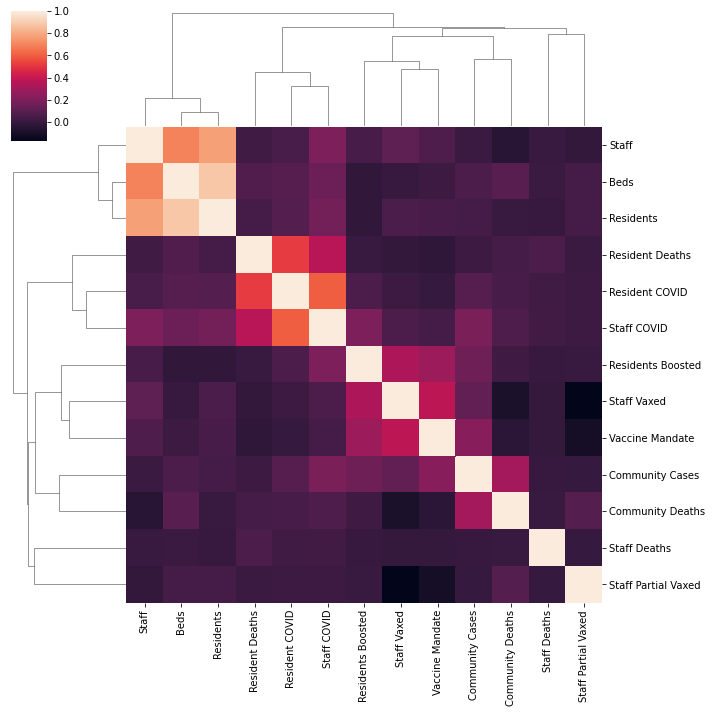

In [31]:
sns.clustermap(featured_elements.corr());

Community Cases appear to track with Community Cases
Beds and Residents, obviously, track very closely.  I should drop beds from the featured elements.
Resident Deaths appear to track with Resident COVID
I think I need to replace LNE with NaN for pctblack,pcthisp, etc.

There is also correlation between Staff Vaxed and Vaccine Mandate, so that is promising

There is correlation with Resident Deaths and Staff COVID, which is frightening

Same with Resident COVID and Staff COVID

There is also a high correlation between number of staff and number of residents.  Therefore, I can drop one of those measurements.

In [32]:
featured_elements.corr()

,Resident COVID,Resident Deaths,Beds,Staff COVID,Staff Deaths,Residents,Staff,Staff Vaxed,Staff Partial Vaxed,Residents Boosted,Community Cases,Community Deaths,Vaccine Mandate
Resident COVID,1.000000,0.523622,0.095955,0.607192,0.031509,0.089353,0.056190,0.021039,0.019336,0.065987,0.095116,0.054292,-0.001919
Resident Deaths,0.523622,1.000000,0.075931,0.362120,0.067641,0.046348,0.031775,-0.009076,0.011100,0.009101,0.019397,0.045102,-0.022830
Beds,0.095955,0.075931,1.000000,0.153296,0.010909,0.887876,0.697885,0.002086,0.046532,-0.013939,0.066272,0.102085,0.016721
Staff COVID,0.607192,0.362120,0.153296,1.000000,0.037779,0.177949,0.203884,0.068065,0.021824,0.203669,0.198721,0.073746,0.045567
Staff Deaths,0.031509,0.067641,0.010909,0.037779,1.000000,0.005029,0.009338,-0.006393,-0.001243,0.001873,0.005436,0.009623,-0.003309
Residents,0.089353,0.046348,0.887876,0.177949,0.005029,1.000000,0.775869,0.062429,0.046807,-0.012470,0.046824,0.007615,0.055344
Staff,0.056190,0.031775,0.697885,0.203884,0.009338,0.775869,1.000000,0.116320,-0.011794,0.053574,0.011363,-0.040341,0.069993
Staff Vaxed,0.021039,-0.009076,0.002086,0.068065,-0.006393,0.062429,0.116320,1.000000,-0.167424,0.330244,0.127448,-0.081221,0.379619
Staff Partial Vaxed,0.019336,0.011100,0.046532,0.021824,-0.001243,0.046807,-0.011794,-0.167424,1.000000,0.009667,0.001174,0.088335,-0.099915
Residents Boosted,0.065987,0.009101,-0.013939,0.203669,0.001873,-0.012470,0.053574,0.330244,0.009667,1.000000,0.160315,0.028312,0.284846
